# Python intro II: 2D plots, basic interpolation, units

## Python programming style

The [PEP 8 -- Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008) describes best practice in terms of programming style for python. 


## 2D plot
We want to plot
$$ z(x,y) = \sin(x)\cos(x) $$

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# experiment with x being a vector -> sin(x) vector
n = 4
x=linspace(-4.,4.,n)
sin(x)

array([ 0.7568025, -0.9719379,  0.9719379, -0.7568025])

In [3]:
# can x be matrix?
xy=array([[1,2],[0,1]])
sin(xy)

array([[0.84147098, 0.90929743],
       [0.        , 0.84147098]])

* how to build a 2D array out of x and y vectors that represent the x and y axis? [numpy.meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html)

In [4]:
n = 50
x=linspace(-3.,5.,n)
y=linspace(-4.,4.,n)
#x

In [5]:
y

array([-4.        , -3.83673469, -3.67346939, -3.51020408, -3.34693878,
       -3.18367347, -3.02040816, -2.85714286, -2.69387755, -2.53061224,
       -2.36734694, -2.20408163, -2.04081633, -1.87755102, -1.71428571,
       -1.55102041, -1.3877551 , -1.2244898 , -1.06122449, -0.89795918,
       -0.73469388, -0.57142857, -0.40816327, -0.24489796, -0.08163265,
        0.08163265,  0.24489796,  0.40816327,  0.57142857,  0.73469388,
        0.89795918,  1.06122449,  1.2244898 ,  1.3877551 ,  1.55102041,
        1.71428571,  1.87755102,  2.04081633,  2.20408163,  2.36734694,
        2.53061224,  2.69387755,  2.85714286,  3.02040816,  3.18367347,
        3.34693878,  3.51020408,  3.67346939,  3.83673469,  4.        ])

In [8]:
xv,yv = meshgrid(x,y)
#yv

In [9]:
z=sin(xv)*cos(yv)
#z

### Image

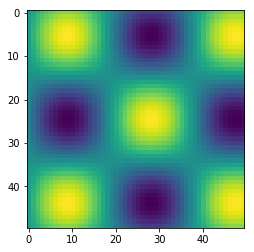

In [10]:
ifig = 2; close(ifig); figure(ifig)
imshow(z)

`imshow` allows for a variety of interpolations, see [images example](http://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html):

In [13]:
#imshow?

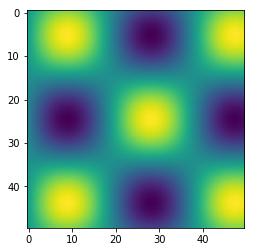

In [14]:
ifig = 3; close(ifig); figure(ifig)
imshow(z,interpolation='gaussian')

### Surface plot

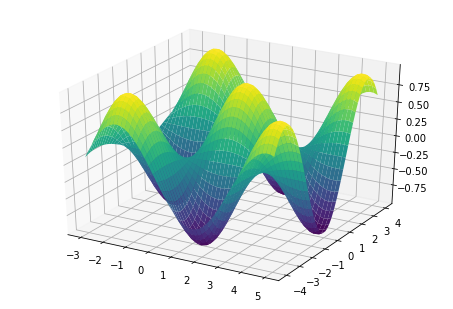

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xv,yv,z, rstride=1, cstride=1, cmap=cm.viridis)
plt.show()

### Countour plot

<a list of 31 text.Text objects>

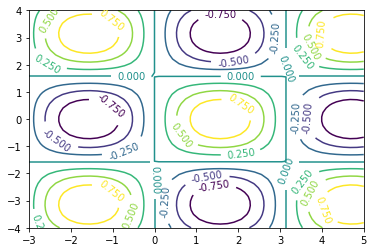

In [15]:
CS = plt.contour(xv, yv, z)
plt.clabel(CS, inline=1, fontsize=10)

## Linear, cubic interpolation and spline interpolation

As in [Part.I/3. Introduction to Python programming](https://github.com/UVic-CompPhys/physmath248-2018/blob/master/Part.I/3.%20Introduction%20to%20Python%20programming.ipynb) start by plotting a polynomial
$$
f(x) = ax^3 + bx^2 + cx + d
$$


In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
a = -1.; b = 1.; c = 1.; d = 1.
f = lambda x: a*x**3 + b*x**2 + c*x + d

In [8]:
n = 20
x = linspace(-2.,2.,n)

Noise the data:

In [16]:
# let's add some mock data
y_eps=1.3; x_eps = 0.1 # x_eps must be small, or make data montonous
                       # for spline
d_err = y_eps*(rand(len(x))-0.5)
y_noise = f(x)+d_err
x_noise = x+x_eps*d_err

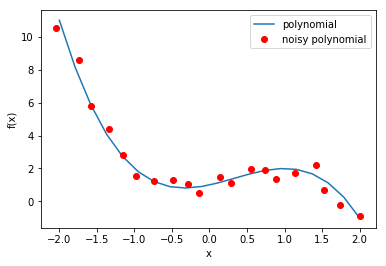

In [17]:
# plot
plot(x,f(x),label='polynomial')
plot(x+x_eps*d_err,f(x)+d_err,'ro',label='noisy polynomial')
legend(loc=0)
xlabel('x')
ylabel('f(x)')

In [18]:
from scipy import interpolate
f_int1=interpolate.interp1d(x_noise,y_noise,kind='linear')
f_int2=interpolate.interp1d(x_noise,y_noise,kind='cubic')
f_spl = interpolate.splrep(x_noise,y_noise, s=5) # vary s, smoothness

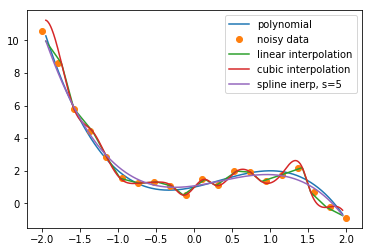

In [21]:
xgrid=linspace(-1.95,1.95,500)
plot(xgrid,f(xgrid),label='polynomial')
plot(x,y_noise,'o',label='noisy data')
plot(xgrid,f_int1(xgrid),label='linear interpolation')
plot(xgrid,f_int2(xgrid),label='cubic interpolation')
plot(xgrid,interpolate.splev(xgrid, f_spl, der=0),label='spline inerp, s=5')
legend(loc=0)

## Units and constants

Physics is about numbers with units. We can draw units into our python work using - of course - appropriate packages. 
There are several packages now that provide unit support, including
* [Astropy](http://docs.astropy.org/en/v0.2.1/units/index.html), also offers [constants](http://docs.astropy.org/en/stable/constants/)
* [SymPy](http://docs.sympy.org/1.0/modules/physics/units.html)
* [Pint](https://pint.readthedocs.io/en/latest)


Here is an example:
* calculate how long a $50\mathrm{W}$ light bulb could shine with the energy that is consumed by destruction when a car going at $120\mathrm{km/h}$ hits a rigid wall.
* before solving this problem make a guess! you may be surprised

### Using astropy

In [23]:
# import astropy unitis package and define variables
import astropy.units as u
m = 1300000 * u.g
v = 120 *u.km/u.hr
E = 0.5*m*v**2
P = 50 * u.watt

In [24]:
# print energy in different units
print (E.to('erg'))
print (E)
print (E.si)
u.erg.find_equivalent_units()

7222222222222.222 erg
9360000000.0 g km2 / h2
722222.2222222222 s W


  Primary name | Unit definition        | Aliases     
[
  J            | kg m2 / s2             | Joule, joule ,
  Ry           | 2.17987e-18 kg m2 / s2 | rydberg      ,
  eV           | 1.60218e-19 kg m2 / s2 | electronvolt ,
  erg          | 1e-07 kg m2 / s2       |              ,
]

In [25]:
# calculate time
t = E / P
print (t.si)
print (t.to('hr'))

14444.444444444443 s
4.012345679012346 h


**Constants:** `astropy` also provides constants:

In [ ]:
from astropy import constants as const
const.L_sun
const.G

### Using sympy

In [44]:
# import sympy unitis package and define variables
import sympy.physics.units as u
u.find_unit('power')

['W', 'watt', 'watts', 'optical_power']

In [45]:
u.find_unit(u.power)

['W', 'watt', 'watts']

In [46]:
u.W

watt

In [38]:
v = 5000*u.meter/u.second

In [39]:
km=1000*u.meters/ u.kilometer

In [40]:
v/km

5*kilometer/second

In [51]:
ww = u.kilogram * u.meter**2 /u.second**3

In [3]:

m = 1300000 * u.g
v = 120 *u.km/u.hour
E = 0.5*m*v**2
P = 50 * u.watt

In [59]:
# calculate time
t = E / P
print (t*(u.watt/ww) * (1000*u.meter/u.kilometer)**2 / (1000*u.gram/u.kilogram) /(3600*u.seconds/u.hour)**3)

4.01234567901235*hour
